In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def relu(x):
    return x*(x>0)

In [4]:
def basef(x, x0, h=1.0, kernel='tophat'):
    if (kernel == 'tophat'):
        f = (np.abs(x-x0) < h).astype(type(x[0]))
    elif (kernel == 'gaussian'):
        f = np.exp(-(x-x0)**2/ (2.*h**2))
    elif (kernel == 'laplacian'):
        f = np.exp(-np.abs(x-x0)/h)
    elif (kernel == 'linear'):
        f = relu(1. - np.abs((x-x0)/h))
    elif (kernel == 'cosine'):
        f = (np.abs(x-x0)<h)*np.cos((x-x0)*np.pi/(2.*h))
    elif (kernel == 'epanechnikov'):
        f = relu(1. - (x-x0)**2/(h**2))
    else: 
        f = 0.*x
    return f

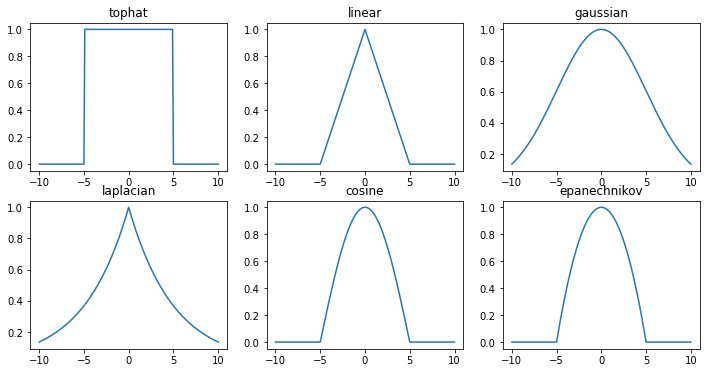

In [5]:
x = np.linspace(-10, 10., 201)
kernels = ['tophat', 'linear', 'gaussian', 'laplacian', 'cosine', 'epanechnikov']
x0 = 0.
h = 5.

plt.figure(figsize=(12,6))
for i in range(0, 6):
    plt.subplot(2,3,i+1)
    y = basef(x, x0, h=h, kernel=kernels[i])
    plt.plot(x, y)
    plt.title(kernels[i])
plt.show()

## Random data

In [6]:
data = np.random.normal(0., 1., (100,)) + 0.2*np.random.normal(7., 5., (100,))
data.shape

(100,)

In [8]:
np.round(data, 3)[:25]

array([ 6.150e-01,  1.599e+00,  1.212e+00,  3.742e+00,  2.448e+00,
       -2.845e+00,  2.303e+00, -1.000e-03,  1.007e+00,  1.728e+00,
        2.188e+00,  2.955e+00, -1.776e+00,  2.837e+00,  2.964e+00,
       -1.420e-01,  4.148e+00,  1.674e+00,  2.371e+00, -1.141e+00,
        2.097e+00,  2.152e+00,  1.330e+00,  1.485e+00,  1.145e+00])

In [9]:
def density(x, n=100, h=1., kernel='tophat'):
    std = x.std()
    minn = x.min() - 2.*std
    maxx = x.max() + 2.*std
    t = np.linspace(minn, maxx, n+1)
    dens = np.zeros(t.shape)
    for i in range(0, x.shape[0]):
        dens = dens + basef(t, x0=x[i], h=h, kernel=kernel)
    dens = dens/x.shape[0]
    return t, dens

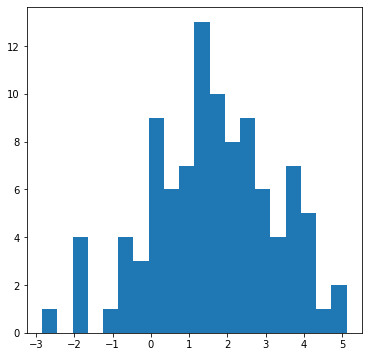

In [10]:
plt.figure(figsize=(6,6))
plt.hist(data, bins=data.shape[0]//5)
plt.show()

In [18]:
t, d = density(data, n=200, h=0.1, kernel='tophat')

<function matplotlib.pyplot.show(close=None, block=None)>

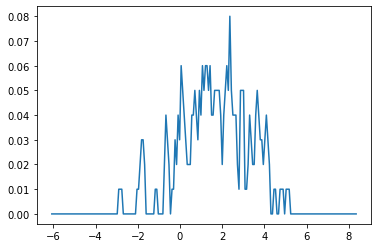

In [19]:
plt.figure()
plt.plot(t, d)
plt.show

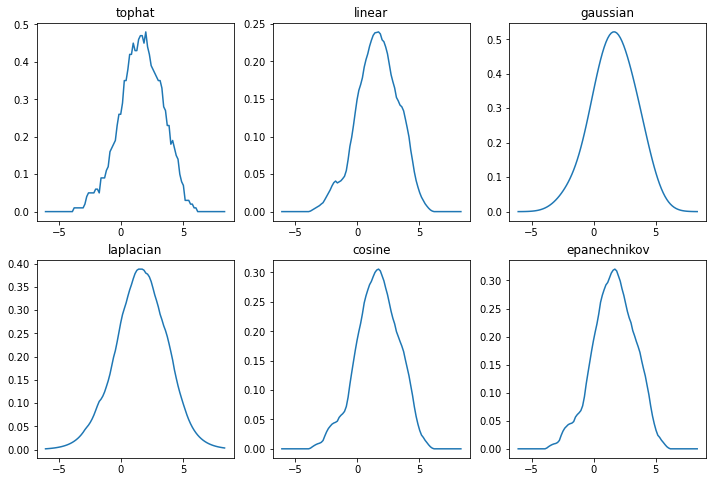

In [21]:
kernels = ['tophat', 'linear', 'gaussian', 'laplacian', 'cosine', 'epanechnikov']
n = 100
h = 1.

plt.figure(figsize=(12,8))
for i in range(0, 6):
    plt.subplot(2,3,i+1)
    t, d = density(data, n=n, h=h, kernel=kernels[i])
    plt.plot(t, d)
    plt.title(kernels[i])
plt.show()

## Scikit-learn

In [22]:
from sklearn.neighbors import KernelDensity
from scipy.stats import norm

In [23]:
# Plot a 1D density example
N = 100
np.random.seed(1)
X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
                    np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]

In [24]:
X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]

In [25]:
true_dens = (0.3 * norm(0, 1).pdf(X_plot[:, 0])
             + 0.7 * norm(5, 1).pdf(X_plot[:, 0]))

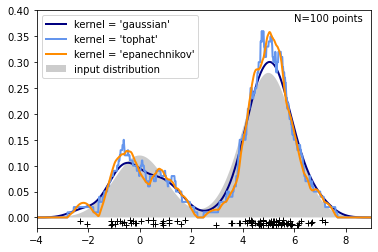

In [26]:
fig, ax = plt.subplots()
ax.fill(X_plot[:, 0], true_dens, fc='black', alpha=0.2,
        label='input distribution')
colors = ['navy', 'cornflowerblue', 'darkorange']
kernels = ['gaussian', 'tophat', 'epanechnikov']
lw = 2

for color, kernel in zip(colors, kernels):
    kde = KernelDensity(kernel=kernel, bandwidth=0.5).fit(X)
    log_dens = kde.score_samples(X_plot)
    ax.plot(X_plot[:, 0], np.exp(log_dens), color=color, lw=lw,
            linestyle='-', label="kernel = '{0}'".format(kernel))

ax.text(6, 0.38, "N={0} points".format(N))

ax.legend(loc='upper left')
ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')

ax.set_xlim(-4, 9)
ax.set_ylim(-0.02, 0.4)
plt.show()

In [27]:
import seaborn as sns

C:\Users\61292\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


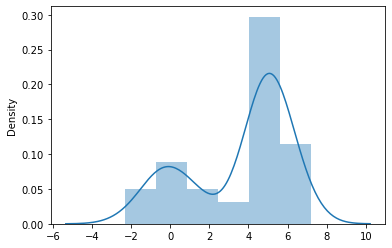

In [30]:
plt.figure()
sns.distplot(X, kde=True)
plt.show()

## Aproximación de funciones

In [31]:
x = np.linspace(0, 10, 101)

In [32]:
centers = np.linspace(0.5, 9.5, 16)
centers

array([0.5, 1.1, 1.7, 2.3, 2.9, 3.5, 4.1, 4.7, 5.3, 5.9, 6.5, 7.1, 7.7,
       8.3, 8.9, 9.5])

In [33]:
#f = 0.75*np.cos(1.7*x) + 1.3*np.cos(1.1*x) + 0.5*np.sin(0.1*x)

f = 1.*np.cos(2.7*x) + 1.7*np.cos(1.35*x) + 0.5*np.sin(2.1*x)

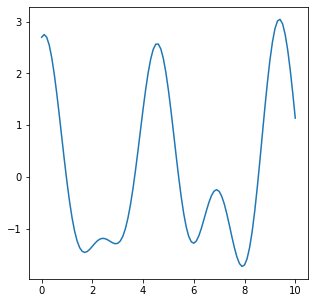

In [34]:
plt.figure(figsize=(5,5))
plt.plot(x, f)
plt.show()

In [35]:
n = x.shape[0]
d = centers.shape[0]
print(n, d)

101 16


In [36]:
X = np.zeros((d, n))
sigma = 1.

for i in range(0, d):
    X[i,:] = basef(x, centers[i], h=sigma, kernel='linear')

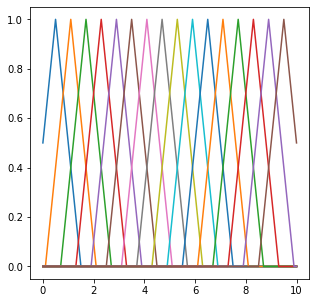

In [37]:
plt.figure(figsize=(5,5))
for i in range(0, d):
    plt.plot(x, X[i])
plt.show()

In [38]:
y = X @ f
a = np.linalg.inv(X@(X.T)) @ y

In [39]:
a

array([ 3.59406938, -2.39220665,  0.24100968, -1.52836617, -0.09773326,
       -1.35772066,  1.74197432,  1.76141206,  0.40914673, -1.52546298,
       -0.09514832,  0.10498876, -1.19048093, -1.27436011,  1.46022553,
        2.59292823])

In [40]:
f.shape

(101,)

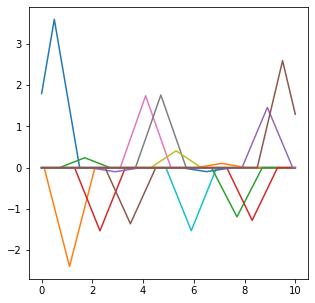

In [41]:
plt.figure(figsize=(5,5))
for i in range(0, d):
    plt.plot(x, a[i]*X[i])
plt.show()

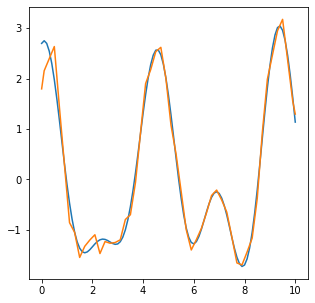

In [42]:
plt.figure(figsize=(5,5))
plt.plot(x, f)
plt.plot(x, X.T@a)
plt.show()